# input data

In [2]:
!ls sub43data

baseline-conn-mat-sub43.png
rs-conn-mat-sub43.png
sub-43_ses-01_task-RLbaseline_run-1_space-fsLR_den-91k_bold_timeseries.tsv
sub-43_ses-01_task-RLlearning_run-1_space-fsLR_den-91k_bold_timeseries.tsv
sub-43_ses-01_task-rest_run-1_space-fsLR_den-91k_bold_timeseries.tsv
sub-43_ses-02_task-leftbaseline_run-1_space-fsLR_den-91k_bold_timeseries.tsv
sub-43_ses-02_task-lefttransfer_run-1_space-fsLR_den-91k_bold_timeseries.tsv
sub-43_ses-02_task-rightbaseline_run-1_space-fsLR_den-91k_bold_timeseries.tsv
sub-43_ses-02_task-rightlearning_run-1_space-fsLR_den-91k_bold_timeseries.tsv


In [3]:
import pandas as pd
baseline = pd.read_csv('sub43data/sub-43_ses-01_task-RLbaseline_run-1_space-fsLR_den-91k_bold_timeseries.tsv', delimiter='\t')
baseline.shape

(219, 998)

In [4]:
baseline

7Networks_LH_Vis_1  7Networks_LH_Vis_2  7Networks_LH_Vis_3  \
0              1.426101            1.894554            0.201228   
1              0.987042            0.709333           -0.333374   
2              0.898949           -0.280639           -0.555696   
3              1.193234           -0.721210           -0.242093   
4              1.578545           -0.315702            0.554474   
..                  ...                 ...                 ...   
214           -0.056728           -1.299437           -0.492261   
215            0.425614           -1.421723           -0.879061   
216            1.050846           -1.315409           -1.376497   
217            1.371740           -1.352251           -1.724804   
218            1.325468           -1.609103           -1.837730   

     7Networks_LH_Vis_4  7Networks_LH_Vis_5  7Networks_LH_Vis_6  \
0              0.934306           -0.719173            1.862952   
1             -0.174620           -1.405659            1.401849   
2             -1.077322           -1.804169            0.943675   
3             -1.432626           -1.684359            0.669252   
4             -1.034153           -1.059829            0.761852   
..                  ...                 ...                 ...   
214           -1.353995           -0.668154           -0.326271   
215           -1.400200           -0.597759           -0.424635   
216           -1.337356           -0.530706           -0.242520   
217           -1.387442           -0.341539           -0.161482   
218           -1.564246            0.047276           -0.287558   

     7Networks_LH_Vis_7  7Networks_LH_Vis_8  7Networks_LH_Vis_9  \
0              1.770194           -1.051675           -0.052146   
1             -0.041699           -1.695795           -0.020028   
2             -1.057008           -2.015780           -0.196367   
3             -1.110382           -1.650742           -0.534842   
4             -0.633313           -0.569117           -0.821442   
..                  ...                 ...                 ...   
214           -1.496279           -0.350578           -1.011852   
215           -1.899306            0.041662           -1.599040   
216           -1.989317            0.347756           -1.944201   
217           -1.684996            0.124635           -1.842586   
218           -1.126108           -0.558048           -1.390551   

     7Networks_LH_Vis_10  ...  7Networks_RH_Default_pCunPCC_11  \
0               1.937436  ...                        -0.105906   
1               1.852793  ...                        -0.969248   
2               1.585644  ...                        -1.470856   
3               1.292074  ...                        -1.310635   
4               1.213028  ...                        -0.501737   
..                   ...  ...                              ...   
214            -0.140495  ...                        -0.363986   
215            -0.652906  ...                        -0.644511   
216            -0.894120  ...                        -0.721676   
217            -0.924894  ...                        -0.362605   
218            -0.845622  ...                         0.386509   

     7Networks_RH_Default_pCunPCC_12  7Networks_RH_Default_pCunPCC_13  \
0                           0.404949                         0.154965   
1                          -0.280748                        -0.217879   
2                          -0.817994                        -0.417104   
3                          -1.037374                        -0.361897   
4                          -0.820150                        -0.084855   
..                               ...                              ...   
214                        -1.520063                        -2.288574   
215                        -1.388642                        -2.149299   
216                        -1.212696                        -2.036523   
217                        -1.081808                        -1.8383

In [5]:
rs43_fname = 'sub-43_ses-01_task-rest_run-1_space-fsLR_den-91k_bold_timeseries.tsv'
rs = pd.read_csv('sub43data/' + rs43_fname, delimiter='\t')
rs.shape

(297, 998)

In [6]:
learning_43_fname = 'sub-43_ses-01_task-RLlearning_run-1_space-fsLR_den-91k_bold_timeseries.tsv'
lrn = pd.read_csv('sub43data/' + learning_43_fname, delimiter='\t')
lrn.shape

(609, 998)

In [7]:
condition_data = rs

In [8]:
from nilearn.connectome import ConnectivityMeasure

correlation_measure = ConnectivityMeasure(kind='correlation')
corr_mat = correlation_measure.fit_transform([condition_data.values])[0]

<AxesSubplot:>

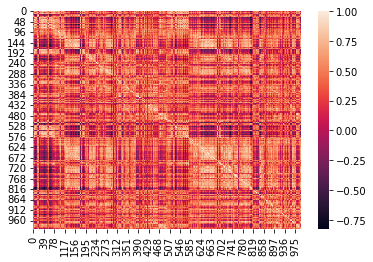

In [9]:
import seaborn as sns

sns.heatmap(
        corr_mat
    )

In [10]:
correlation_measure_baseline = ConnectivityMeasure(kind='correlation')
corr_mat_baseline = correlation_measure_baseline.fit_transform([baseline.values])[0]

In [11]:
correlation_measure_lrn = ConnectivityMeasure(kind='correlation')
corr_mat_lrn = correlation_measure_lrn.fit_transform([lrn.values])[0]

# atlas

In [12]:
from nilearn.datasets import fetch_atlas_schaefer_2018

atlas = fetch_atlas_schaefer_2018(n_rois=1000, resolution_mm=2)

labels = [x.decode() for x in atlas['labels']]

/Users/qasem/.local/lib/python3.8/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [13]:
len(labels)

1000

In [14]:
atlas['labels'].shape

(1000,)

In [15]:
from brainspace.utils.parcellation import reduce_by_labels

In [16]:
# masked_regions = ['7Networks_RH_Cont_Cing_1', '7Networks_RH_Vis_33']
# masked_regions = [l for l in labels if l not in masked_regions]
# len(masked_regions)

In [17]:
atlas.keys()

dict_keys(['maps', 'labels', 'description'])

In [18]:
atlas.maps
# you can even view this file with vscode extension neuroview

'/Users/qasem/nilearn_data/schaefer_2018/Schaefer2018_1000Parcels_7Networks_order_FSLMNI152_2mm.nii.gz'

## removing regions

In [19]:
# Remove non-cortex regions
regions = atlas['labels'].copy().tolist()


In [20]:
masked_regions = [b'7Networks_RH_Cont_Cing_1', b'7Networks_RH_Vis_33']
masked_labels = [regions.index(r) for r in masked_regions]
masked_labels

[902, 532]

In [21]:
for r in masked_regions:
    regions.remove(r)

len(regions)

998

# conn matrix

<AxesSubplot:ylabel='Count'>

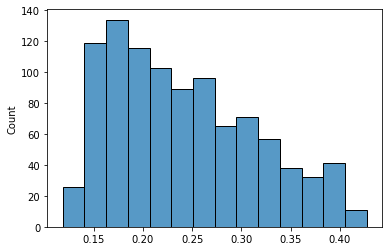

In [22]:
import numpy as np

sns.histplot(np.std(corr_mat, axis=0))

In [25]:
from nilearn import plotting

# Reduce matrix size, only for visualization purposes
mat_mask = np.where(np.std(corr_mat, axis=1) > 0.2)[0]
corr_mat_masked = corr_mat[mat_mask][:, mat_mask]
# Create corresponding region names
regions_list = ['%s_%s' % (h, r.decode()) for h in ['L', 'R'] for r in regions]
masked_regions = [regions_list[i] for i in mat_mask]

In [26]:
len(mat_mask)

636

In [27]:
mat_mask[:10] # e.g. no 5 and 6 

array([ 1,  2,  3,  4,  7,  8,  9, 10, 11, 12])

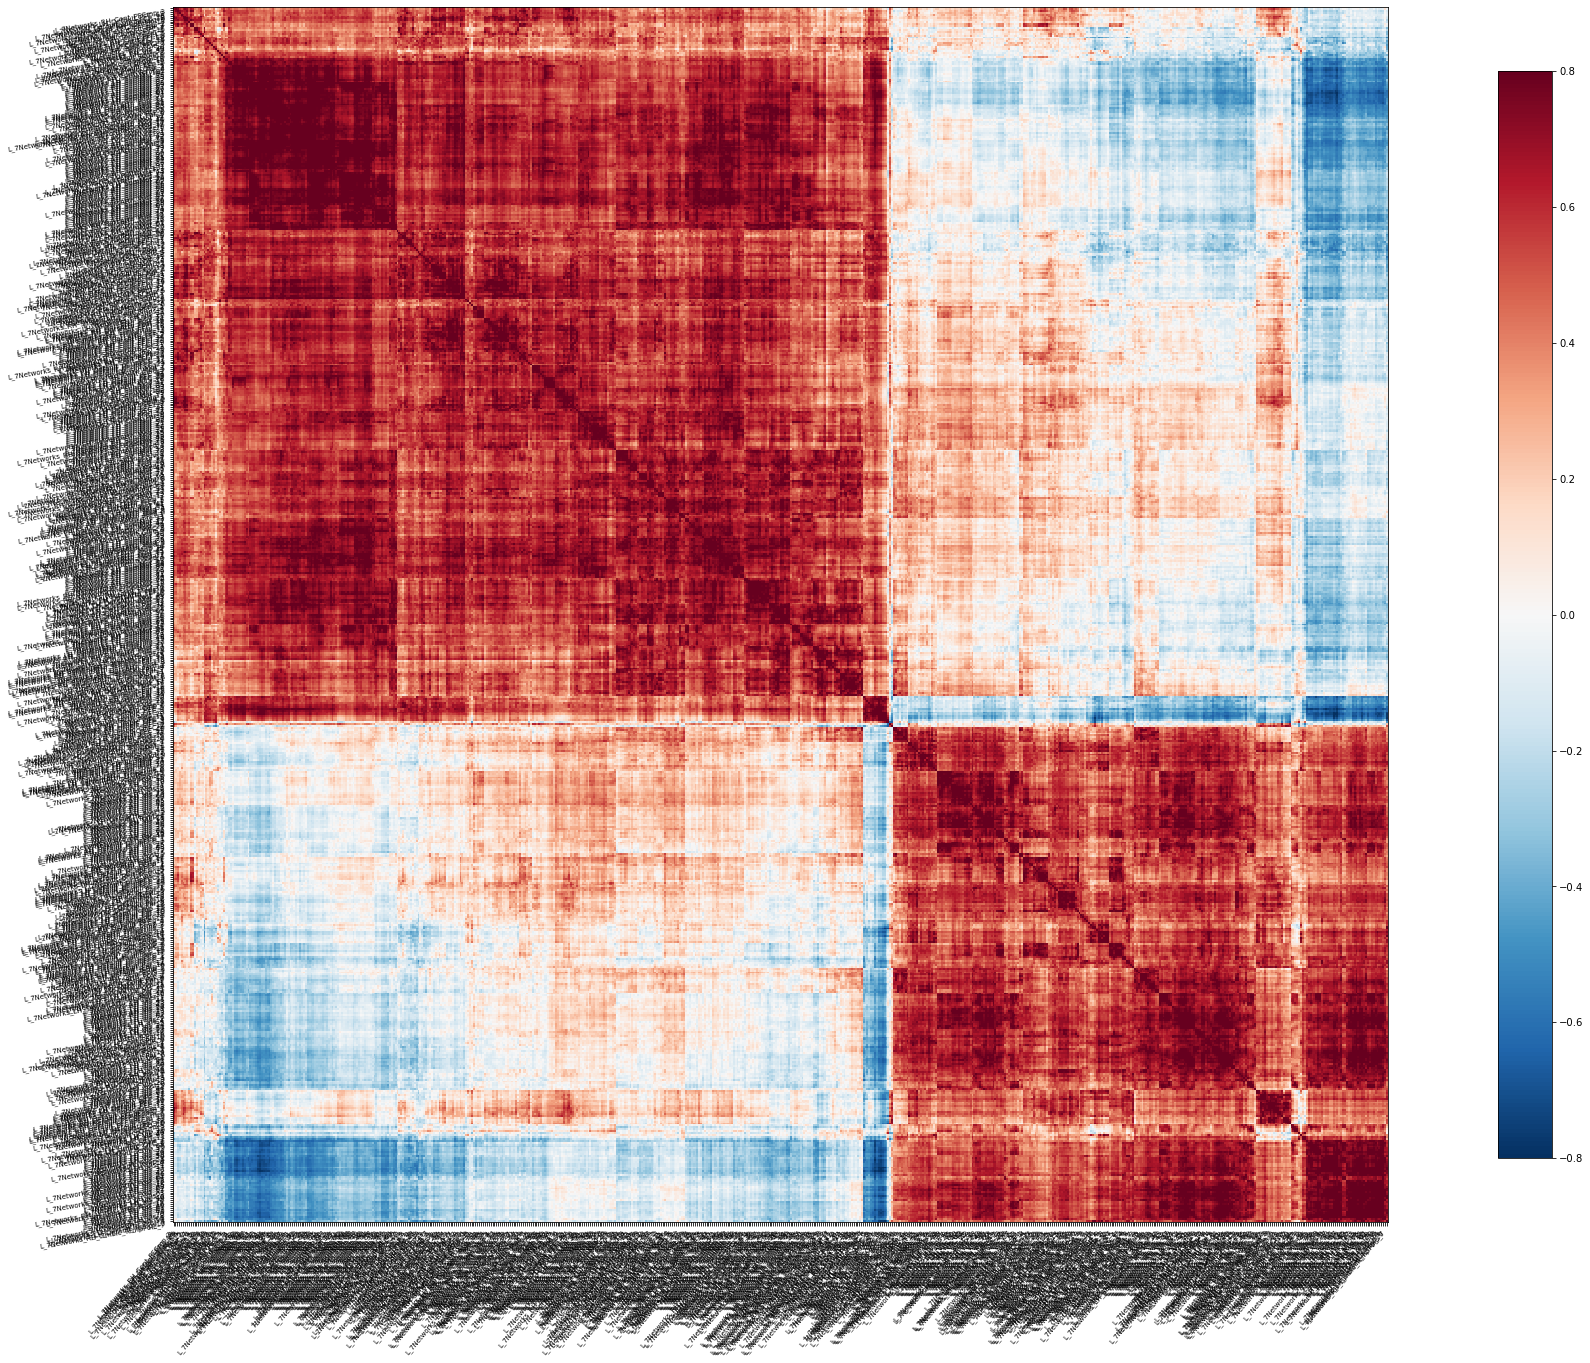

In [47]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,25))
ax = plotting.plot_matrix(corr_mat_masked, labels=masked_regions,
                                 vmax=0.8, vmin=-0.8, reorder=True,
                                 figure=fig,
                                #  figure=(15, 15), 
                                 )

fig.savefig('con-mat.png')

998

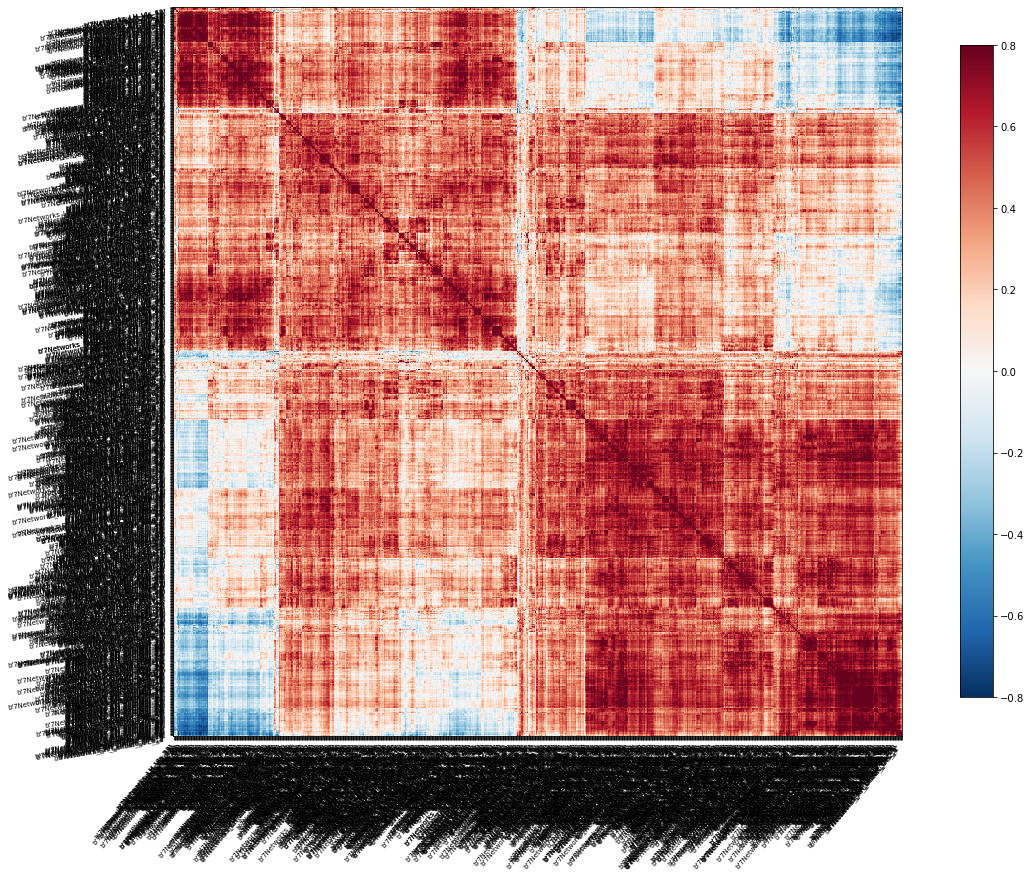

In [87]:
ax = plotting.plot_matrix(corr_mat, figure=(15, 15), labels=regions,
                                 vmax=0.8, vmin=-0.8, reorder=True)

reordered_labels = [lbl.get_text() for lbl in ax.axes.get_xticklabels()]
len(reordered_labels)

## reordering

In [106]:
regions[:5], reordered_labels[:5]

([b'7Networks_LH_Vis_1',
  b'7Networks_LH_Vis_2',
  b'7Networks_LH_Vis_3',
  b'7Networks_LH_Vis_4',
  b'7Networks_LH_Vis_5'],
 ["b'7Networks_LH_Vis_53'",
  "b'7Networks_LH_Vis_49'",
  "b'7Networks_LH_Vis_34'",
  "b'7Networks_LH_Default_Temp_20'",
  "b'7Networks_LH_Limbic_OFC_11'"])

In [107]:
ls = ['a', 'b', 'c', 'd']
nls = ['b', 'c', 'd', 'a']
[ls.index(e) for e in nls]

[1, 2, 3, 0]

In [113]:
str_regions = [str(r) for r in regions]
regions_ordering = [str_regions.index(r) for r in reordered_labels]

In [128]:
corr_mat_reordered = corr_mat[regions_ordering][:, regions_ordering]

In [1]:
plotting.plot_matrix(corr_mat_reordered, figure=(15, 15),
                        labels=reordered_labels, reorder=False,
                        vmax=0.8, vmin=-0.8)

NameError: name 'plotting' is not defined

https://github.com/nilearn/nilearn/issues/1633

## baseline and learning respecting to rs 

now that we have the orders, we can input that to the next cond_data

In [122]:
corr_mat_baseline.shape

(998, 998)

In [124]:
corr_mat_baseline_reordered = corr_mat_baseline[regions_ordering][:, regions_ordering]

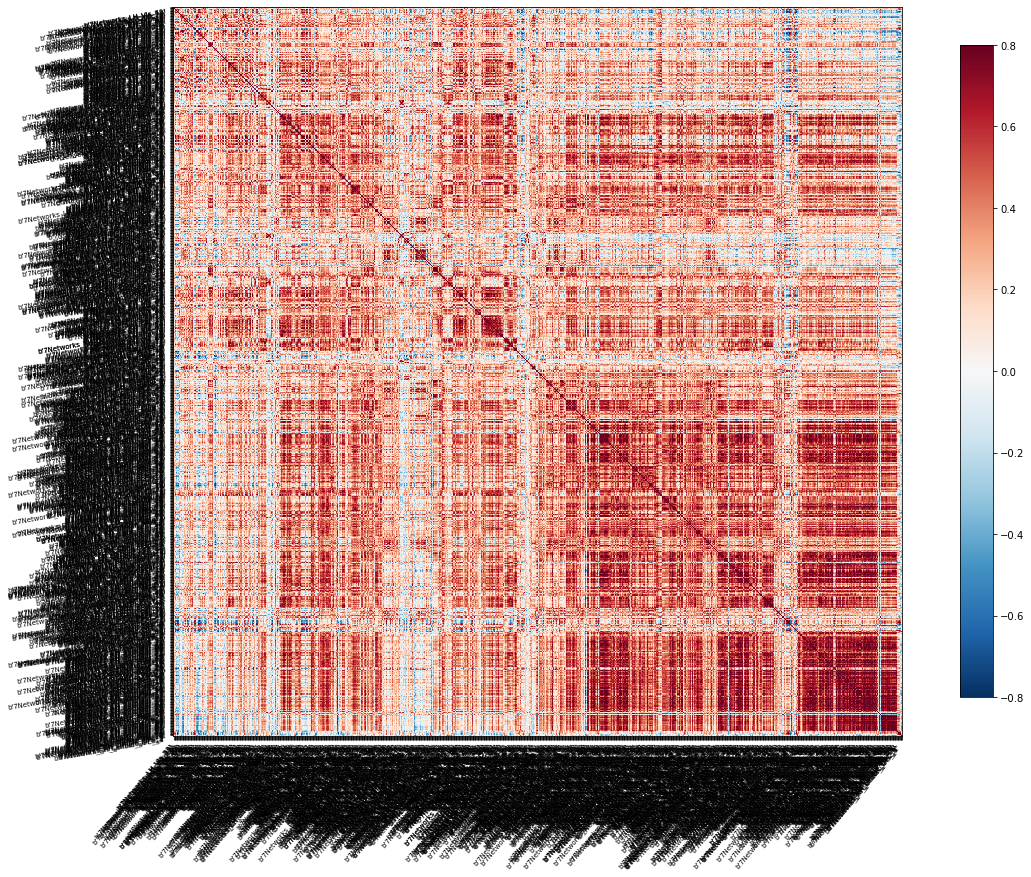

In [125]:
plotting.plot_matrix(corr_mat_baseline_reordered,
                        figure=(15, 15),
                        labels=reordered_labels, reorder=False,
                        vmax=0.8, vmin=-0.8)

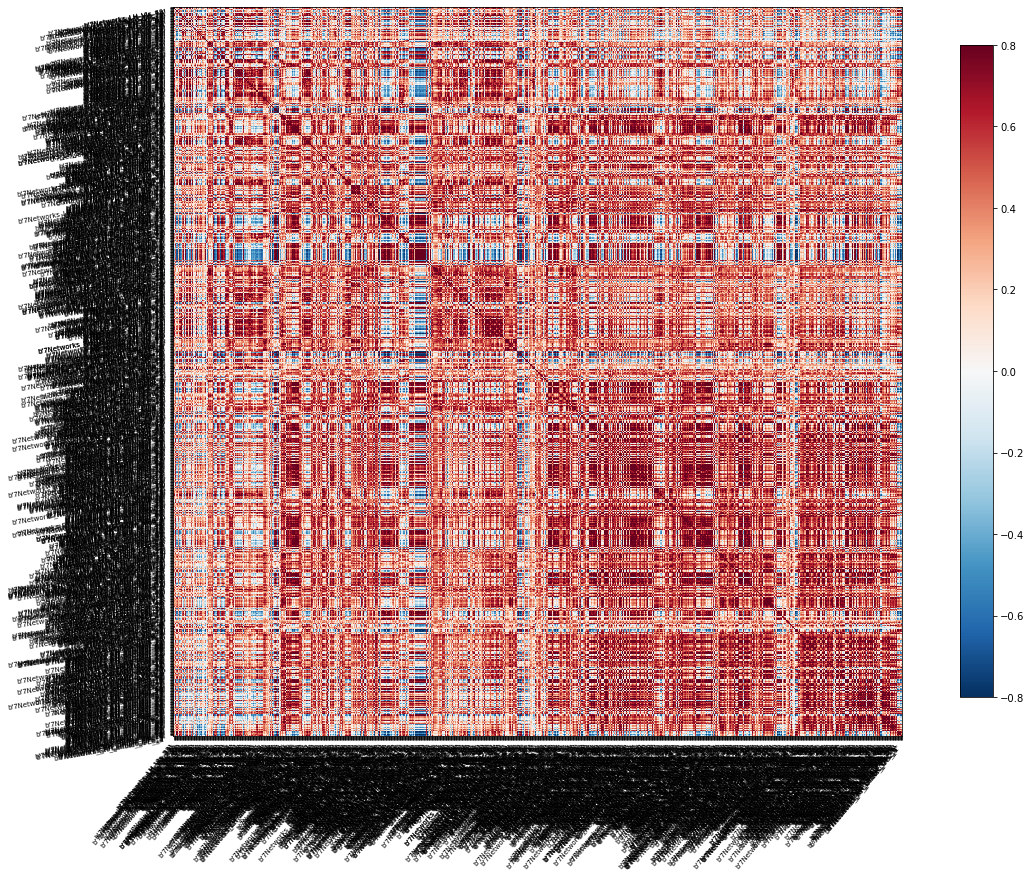

In [127]:
corr_mat_lrn_reordered = corr_mat_lrn[regions_ordering][:, regions_ordering]
plotting.plot_matrix(corr_mat_lrn_reordered,
                        figure=(15, 15),
                        labels=reordered_labels, reorder=False,
                        vmax=0.8, vmin=-0.8)

---

# plot surf

In [26]:
import nibabel as nib
import numpy as np

surf_labels_lh = nib.freesurfer.read_annot('atlas/Schaefer2018_1000Parcels_7Networks/lh.Schaefer2018_1000Parcels_7Networks_order.annot')[0]
surf_labels_rh = nib.freesurfer.read_annot('atlas/Schaefer2018_1000Parcels_7Networks/rh.Schaefer2018_1000Parcels_7Networks_order.annot')[0]
surf_labels_rh[surf_labels_rh != 0] += 500  # different labels for lh and rh
surf_labels = np.concatenate([surf_labels_lh, surf_labels_rh])


In [27]:
(surf_labels == 0).sum()

1743

In [28]:
masked_labels += [0]
masked_labels

[902, 532, 0]

In [29]:
# Build Destrieux parcellation and mask

mask = ~np.isin(surf_labels, masked_labels)

In [30]:
surf_labels

array([145, 214, 128, ..., 833, 833, 833], dtype=int32)

In [31]:
len(mask), (mask == False).sum()

(20484, 1773)

In [ ]:
len(set(surf_labels)), len(set(surf_labels[mask]))

(1001, 998)

## gradients

In [42]:
from brainspace.gradient import GradientMaps
gm = GradientMaps(n_components=10, random_state=0, alignment="procrustes",
                      approach="dm")

gm.fit(corr_mat, sparsity=0.9)
# shape of Gsub.gradients_[:, 0] is 1000

/Users/qasem/opt/anaconda3/envs/nienv/lib/python3.8/site-packages/brainspace/gradient/embedding.py:70: UserWarning: Affinity is not symmetric. Making symmetric.
  warnings.warn('Affinity is not symmetric. Making symmetric.')


GradientMaps(alignment='procrustes', random_state=0)

In [43]:
gm

GradientMaps(alignment='procrustes', random_state=0)

In [47]:
gm.__dict__

{'n_components': 10,
 'approach': 'dm',
 'kernel': None,
 'alignment': 'procrustes',
 'random_state': 0,
 'gradients_': array([[-4.21455415, -0.5570384 ,  3.26919146, ..., -0.62405394,
         -0.35959993, -0.1816703 ],
        [16.02812326, -3.58903473, -0.23219478, ..., -0.35693188,
         -0.08792387,  0.29882881],
        [17.28398909, -3.5836734 , -1.558999  , ..., -1.35943077,
         -0.49006594,  0.42567861],
        ...,
        [-8.76517935,  1.49561863, -1.62427879, ..., -0.57834988,
         -1.17701074,  0.15888671],
        [ 4.50014378,  5.03492228,  0.45224814, ...,  0.44550527,
         -1.37393756, -0.94110717],
        [-1.15144   ,  5.61281257, -0.38089623, ..., -0.33830418,
         -2.06409429, -0.79373955]]),
 'lambdas_': array([10.11716293,  3.34884955,  2.31839075,  1.91212787,  1.59468327,
         1.48729122,  1.20089345,  1.19500223,  0.97950872,  0.91283478]),
 'aligned_': None}

In [50]:
gm.gradients_.shape

(998, 10)

In [51]:
from brainspace.utils.parcellation import map_to_labels

grad = map_to_labels(gm.gradients_[:, 0], surf_labels, mask=mask, fill=np.nan)

In [52]:
grad2 = map_to_labels(gm.gradients_[:, 1], surf_labels, mask=mask, fill=np.nan)

In [53]:
from brainspace.datasets import load_fsa5
surf_lh, surf_rh = load_fsa5()

In [ ]:
#todo surfplot
# from surfplot import Plot

# p = Plot(surf_lh=surf_lh, surf_rh=surf_rh)
# p.add_layer(
#     surf_labels, cbar=True, cmap='tab20',  
# )

# # fig = p.build()
# # fig.show()
# p.show()


# array_name=[surf_labels, grad, grad2], 
# filename='subject 43 - baseline gradients',
#     size=(1200, 600), color_bar=True, 
#     cmap=['tab20', 'viridis_r', 'viridis_r'],
#     zoom=1.5, label_text=['Schaefer\n1000', 'First\ngradient', 'Second\ngradient'])

# fig = p.build()
# # show figure, as you typically would with matplotlib
# fig.show()

In [54]:
from brainspace.plotting import plot_hemispheres

plot_hemispheres(surf_lh=surf_lh, surf_rh=surf_rh,
array_name=[surf_labels, grad, grad2], 
filename='subject 43 - baseline gradients',
    size=(1200, 600), color_bar=True, 
    cmap=['tab20', 'viridis_r', 'viridis_r'],
    zoom=1.5, label_text=['Schaefer\n1000', 'First\ngradient', 'Second\ngradient'])